#  Proyecto 1

##### Gladys Andrea Rodríguez Guerrero  -  20006107

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import joblib

### Selección de Variables

In [2]:
X_train = pd.read_csv("preprocess_data/prep_Xtrain.csv")
X_test = pd.read_csv("preprocess_data/prep_Xtest.csv")
X_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.0,0.0,1.0,1.0,0.000000,0.0,0.048652,0.092436,0.046016,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08
1,1.0,0.5,0.0,1.0,0.000000,0.0,0.256631,0.108757,0.213244,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08
2,1.0,0.0,0.0,1.0,0.000000,0.0,0.194712,0.088259,0.161616,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.04
3,1.0,0.5,0.0,1.0,0.000000,0.0,0.310449,0.141120,0.270483,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,0.0,0.5,1.0,1.0,0.052632,0.0,0.033708,0.028800,0.034792,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [3]:
y_train = pd.read_csv("preprocess_data/prep_ytrain.csv")
y_test = pd.read_csv("preprocess_data/prep_ytest.csv")

y_train.head()

,TARGET
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [4]:
#objeto selector de variables
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [5]:
sel_.get_support().sum()

21

In [6]:
sel_.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False])

In [7]:
selected_features = X_train.columns[(sel_.get_support())]
selected_features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'WALLSMATERIAL_MODE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_MON'],
      dtype='object')

In [8]:
pd.Series(selected_features).to_csv('preprocess_data/selected_features.csv', index=False)

### Entrenamiento del Modelo

In [9]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [10]:
# Creando el modelo

linear_model = Lasso(alpha=0.001, random_state=2022)

linear_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=2022)

### Predicción

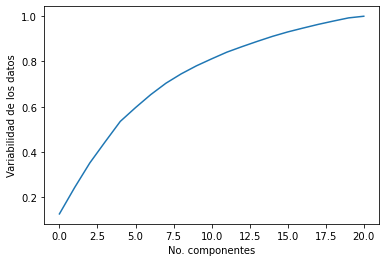

In [11]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components = sel_.get_support().sum()) 
pca.fit(X_train) # obtener los componentes principales
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
 
#graficamos el acumulado de variablidad en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. componentes')
plt.ylabel('Variabilidad de los datos')
plt.show()

In [12]:
# seleccion de componentes PCA
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

###### * Train

In [13]:
preds_train = linear_model.predict(X_train)

In [14]:
#Resultados obtenidos del Train
print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), np.exp(preds_train))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), 
                                                           np.exp(preds_train), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_train), np.exp(preds_train))))

MSE de Entrenamiento: 0.2110409681605647
RMSE de Entrenamiento: 0.4593919548278623
R2 de Entrenamiento: 0.03334488906395594


###### * Test

In [15]:
preds_test = linear_model.predict(X_test)

In [16]:
#Resultados del Test
print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), np.exp(preds_test))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), 
                                                           np.exp(preds_test), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_test), np.exp(preds_test))))

MSE de Entrenamiento: 0.21611963143540916
RMSE de Entrenamiento: 0.46488668666182426
R2 de Entrenamiento: 0.03330981807821298


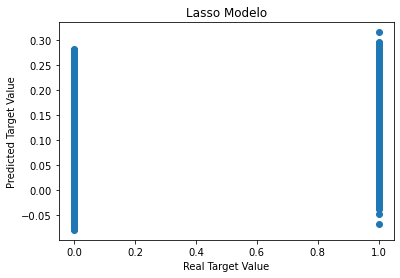

In [17]:
plt.scatter(y_test, preds_test)
plt.xlabel("Real Target Value")
plt.ylabel("Predicted Target Value")
plt.title("Lasso Modelo")
plt.show()

El modelo predice de mejor los datos ya vistos que los que aun no ha visto

In [18]:
importance = pd.Series(np.abs(linear_model.coef_.ravel()))
importance.index = selected_features
importance.sort_values(inplace=True, ascending=False)

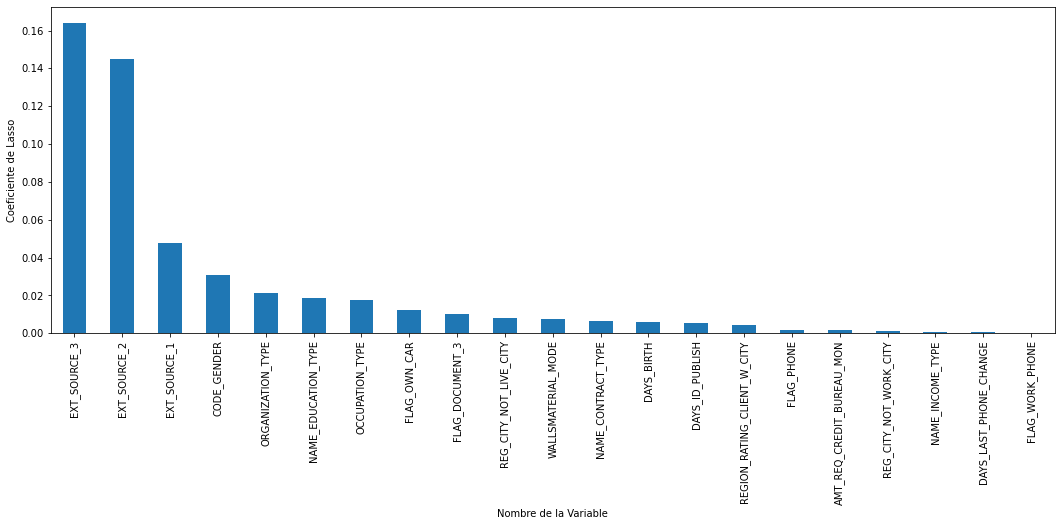

In [19]:
importance.plot.bar(figsize=(18, 6))
plt.ylabel("Coeficiente de Lasso")
plt.xlabel("Nombre de la Variable")
plt.show()

In [21]:
joblib.dump(linear_model, 'final_model/lasso_reg.joblib')

['final_model/lasso_reg.joblib']